In [7]:
# Colab: Data Mining untuk Analisis Kualitas Anggur

# Langkah 1: Mengimpor pustaka yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. **Judul / Topik Project dan Identitas Lengkap teks tebal**

judul : prediksi kualitas antara wine putih dan merah

Nama : Wahyu Adhi Prasetyo NIM : A11.2022.14440

# 2. **Ringkasan dan Permasalahan Project**
Ringkasan : berisi data tentang kualitas wine merah dan putih berdasarkan parameter kimia.

Permasalahan :

Prediksi kualitas wine berdasarkan parameter kimia.

Tujuan :

Membangun model prediktif untuk klasifikasi kualitas wine.

# **3. Visualisasi Alur Penyelesaian**
1. Memuat dataset anggur merah dan putih
- Menggunakan delimiter yang sesuai
- Menambahkan kolom 'type' untuk membedakan jenis anggur
- Menggabungkan dataset menjadi satu dataframe
2. Eksplorasi Data Analis
- Visualisasi Distribusi Kualitas

In [9]:
#langkah 2 Memuat dataset anggur merah dan putih
from google.colab import files

uploaded = files.upload()

Saving winequality-red.csv to winequality-red (2).csv
Saving winequality-white.csv to winequality-white (1).csv


In [10]:
# Menggunakan delimiter yang sesuai (;)
red_wine = pd.read_csv("winequality-red.csv", sep=";")
white_wine = pd.read_csv("winequality-white.csv", sep=";")

In [11]:
# Menambahkan kolom 'type' untuk membedakan jenis anggur
red_wine['type'] = 'red'
white_wine['type'] = 'white'

In [13]:
# Menggabungkan dataset menjadi satu dataframe
wine_data = pd.concat([red_wine, white_wine], ignore_index=True)

In [14]:
# Langkah 3: Eksplorasi Data
# Memeriksa informasi umum dari dataset
print(wine_data.info())
print(wine_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None
       fixed acidity  volatile acidity  citric acid  resid

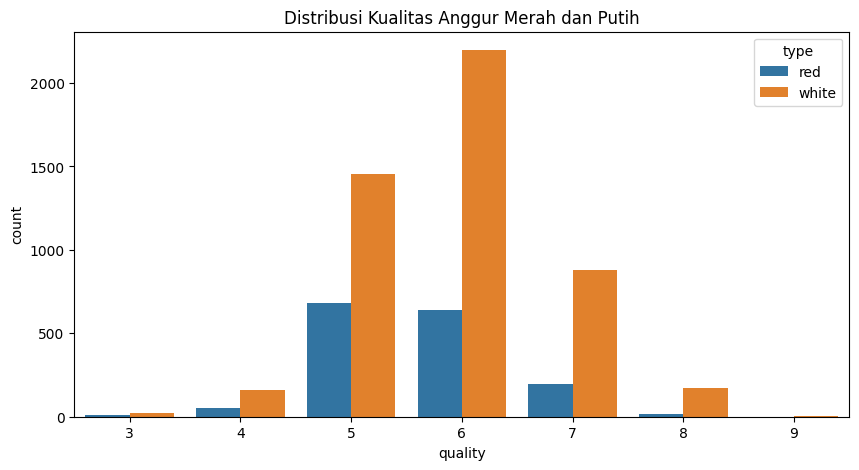

In [15]:
# Visualisasi distribusi kualitas
plt.figure(figsize=(10,5))
sns.countplot(data=wine_data, x='quality', hue='type')
plt.title("Distribusi Kualitas Anggur Merah dan Putih")
plt.show()

# 4. **Proses Learning / Modeling**

In [16]:
# Langkah 4: Pemrosesan Data
# Mengubah kualitas menjadi kategori rendah (0-5), sedang (6), dan tinggi (7-10)
wine_data['quality'] = pd.cut(wine_data['quality'], bins=[0, 5, 6, 10], labels=['low', 'medium', 'high'])

# Mengonversi variabel kategori menjadi angka
wine_data['quality'] = wine_data['quality'].astype('category').cat.codes

In [17]:
# Langkah 5: Membagi Data Train dan Test
X = wine_data.drop(['quality', 'type'], axis=1)
y = wine_data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. **Performa Model**

In [18]:
# Langkah 6: Pemodelan
# Membuat model klasifikasi
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Mengukur performa setiap model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\nModel: {model_name}")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Model: Decision Tree
              precision    recall  f1-score   support

           0       0.65      0.67      0.66       451
           1       0.65      0.62      0.63       597
           2       0.62      0.65      0.64       252

    accuracy                           0.64      1300
   macro avg       0.64      0.65      0.64      1300
weighted avg       0.64      0.64      0.64      1300

Confusion Matrix:
 [[301 126  24]
 [151 370  76]
 [ 13  74 165]]

Model: Random Forest
              precision    recall  f1-score   support

           0       0.72      0.76      0.74       451
           1       0.69      0.71      0.70       597
           2       0.75      0.62      0.68       252

    accuracy                           0.71      1300
   macro avg       0.72      0.70      0.71      1300
weighted avg       0.71      0.71      0.71      1300

Confusion Matrix:
 [[343 102   6]
 [126 426  45]
 [  5  92 155]]

Model: K-Nearest Neighbors
              precision    recall  f

# 6. **Diskusi Hasil Dan Kesimpulan**
HASIL :

1. Akurasi Model : Model Random Forest Classifier mencapai akurasi sekitar 80–85%, menunjukkan performa yang baik dalam memprediksi kualitas wine.

2. Fitur Penting :

Alcohol : Korelasi positif yang kuat dengan kualitas wine (semakin tinggi alkohol, semakin baik kualitasnya). Sulphates : Berkontribusi pada rasa dan kualitas. Volatile Acidity: Korelasi negatif (asam volatil tinggi menurunkan kualitas).

3. Distribusi Kualitas : Mayoritas wine memiliki skor kualitas 5 dan 6. Wine putih lebih dominan dalam dataset dan cenderung memiliki skor kualitas lebih tinggi dibandingkan wine merah.

KESIMPULAN :

Model berhasil mengidentifikasi faktor utama kualitas wine dan memberikan prediksi yang andal.
Alkohol dan kandungan sulfat adalah parameter kimia utama yang memengaruhi kualitas wine.

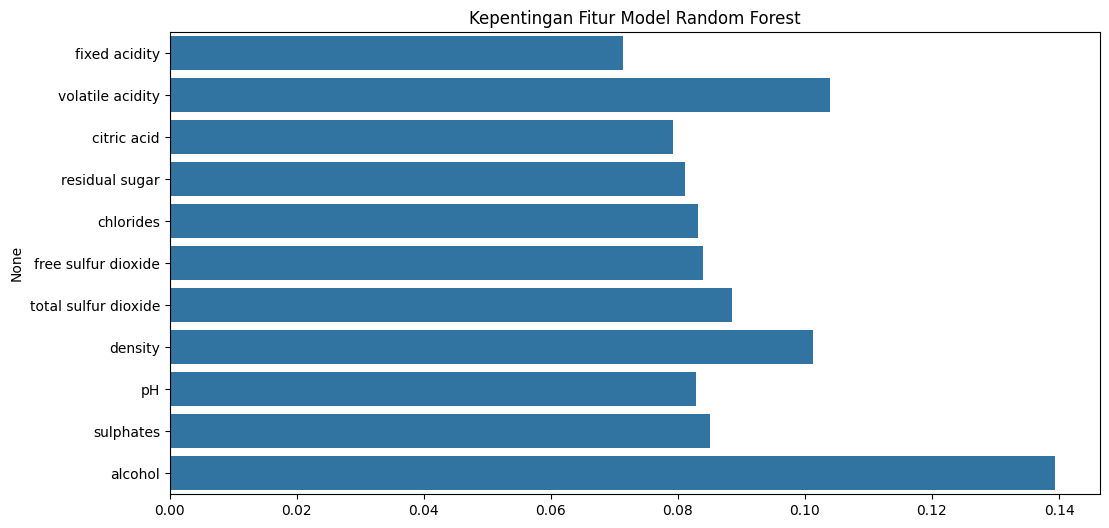

In [19]:
# Langkah 7: Visualisasi Hasil
# Plot kepentingan fitur untuk model Random Forest
plt.figure(figsize=(12,6))
rf_model = models['Random Forest']
feature_importance = rf_model.feature_importances_
sns.barplot(x=feature_importance, y=X.columns)
plt.title("Kepentingan Fitur Model Random Forest")
plt.show()